# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

# Import Data

In [2]:
# Import relationship data
relationship_df = pd.read_csv('Key_Events_20th_Century_relationship.csv', index_col = 0)

In [3]:
relationship_df

,source,target,value
0,france,panama,1
1,france,russia,7
2,germany,russia,9
3,bulgaria,germany,1
4,bulgaria,russia,1
...,...,...,...
68,israel,japan,2
69,germany,india,5
70,pakistan,russia,3
71,russia,vietnam,4


# Create a network object from the countries relationships dataframe

In [4]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source="source", 
                            target="target", 
                            edge_attr="value", 
                            create_using=nx.Graph())

# Create a static network graph using only NetworkX

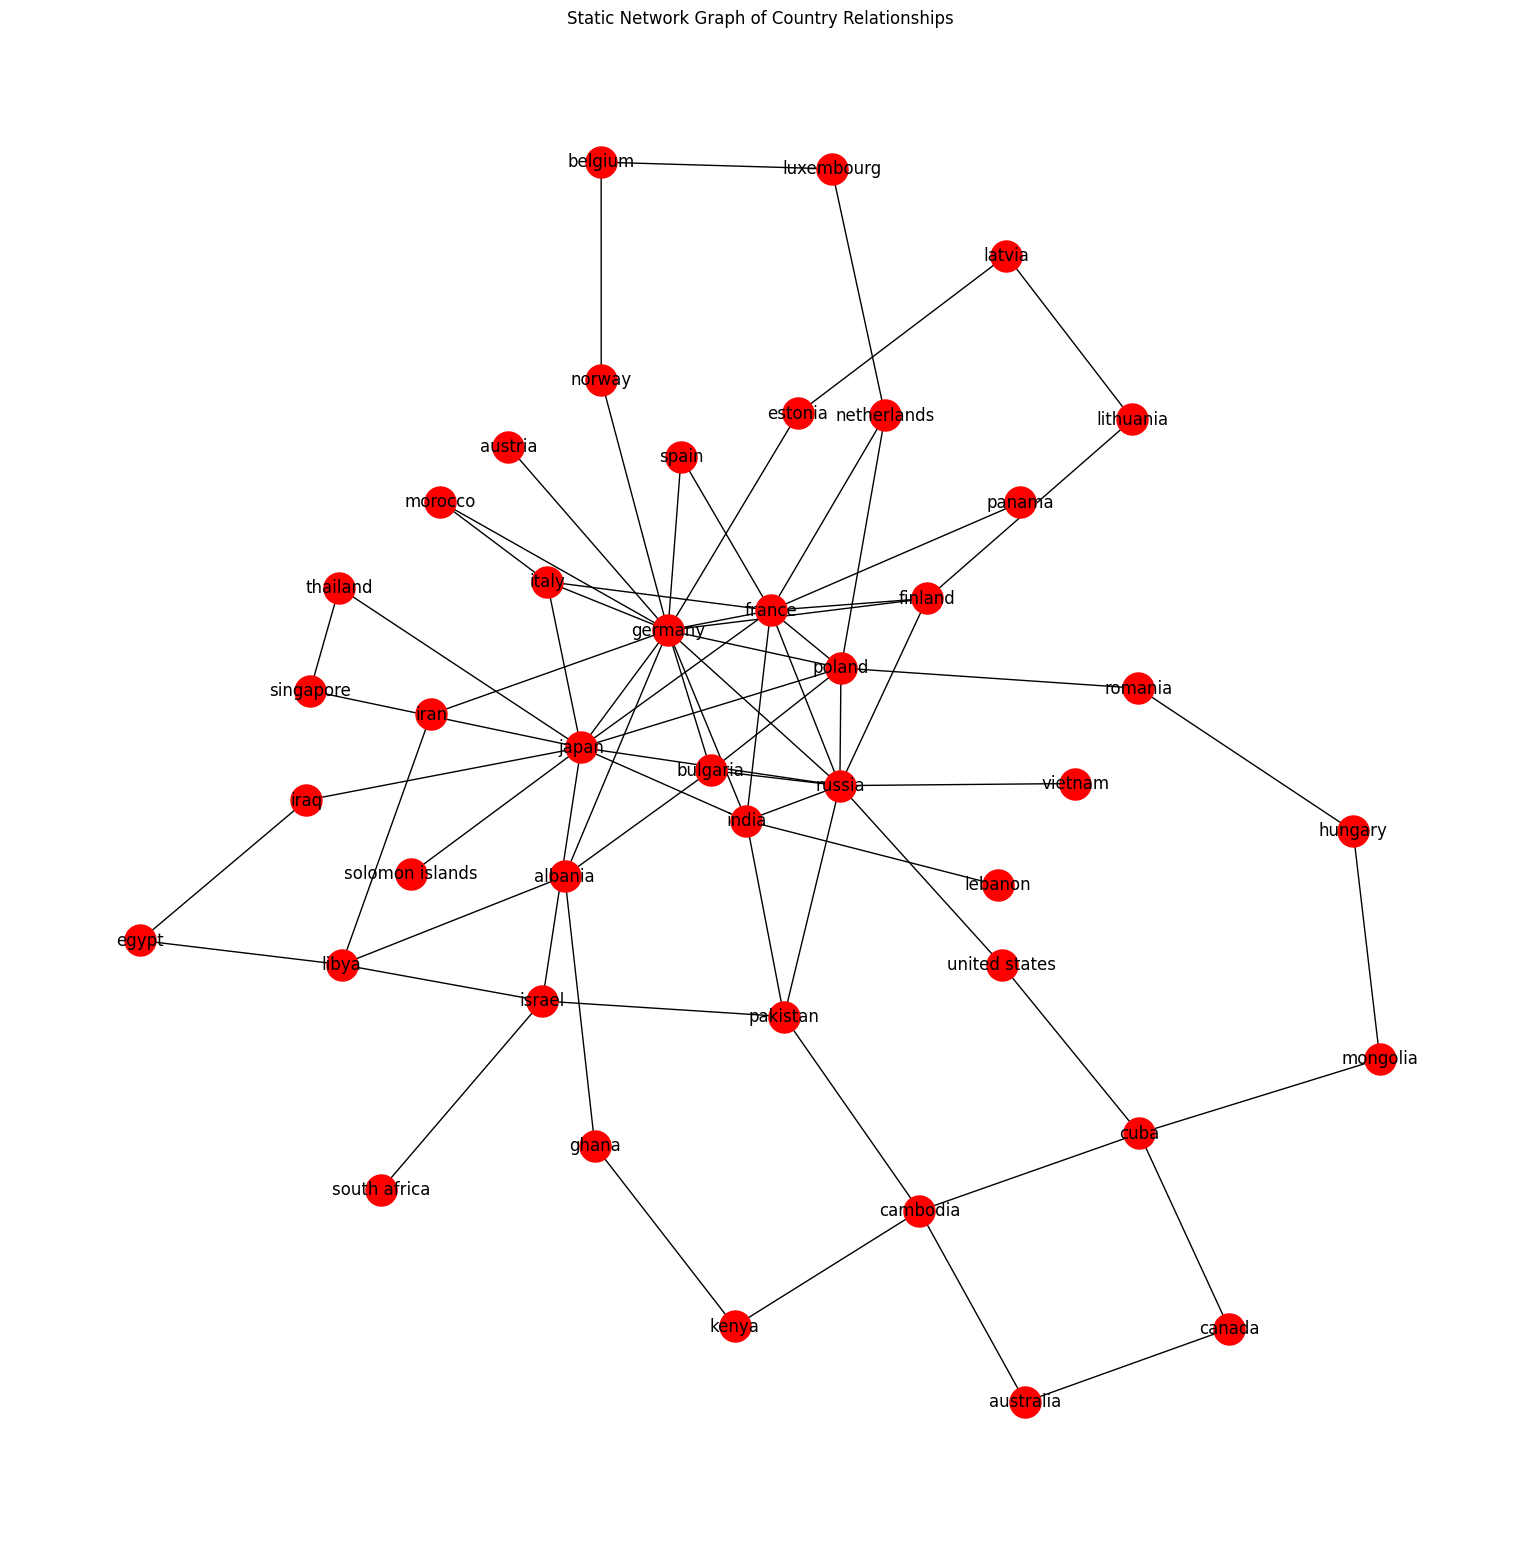

In [5]:
# Create a figure for the graph
h = plt.figure(figsize=(15, 15))

# Use Kamada-Kawai layout for better visualization
pos = nx.kamada_kawai_layout(G)

# Draw the graph with specified parameters
nx.draw(G, pos, with_labels=True, node_color='red', edge_color='black',  # Set edge_color to black
        node_size=500, font_size=12, font_color='black')

# Show the plot
plt.title("Static Network Graph of Country Relationships")
plt.show()

In [6]:
# Save the figure
h.savefig('networkx_plt_country.png')

# Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file

In [10]:
# Create a Network object for PyVis
net = Network(notebook=True, width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')

# Load the NetworkX graph into PyVis
net.from_nx(G)

# Show network graph with options
net.show_buttons(filter_=['physics']) 

# Set up physics for layout adjustments
net.repulsion()

# Save the interactive network graph as an HTML file
net.show("interactive_network.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [12]:
!pip install igraph leidenalg

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 14.0 MB/s eta 0:00:00


In [13]:
from cdlib import algorithms

# Apply the Leiden algorithm to detect communities
coms = algorithms.leiden(G)

In [14]:
# Check the type of the output
print(type(coms))

<class 'cdlib.classes.node_clustering.NodeClustering'>


In [15]:
# Convert the community detection result to a node-community map
new_com = coms.to_node_community_map()

In [16]:
# Print the node-community mapping
print(new_com)

defaultdict(<class 'list'>, {'france': [0], 'panama': [0], 'germany': [0], 'italy': [0], 'austria': [0], 'spain': [0], 'estonia': [0], 'latvia': [0], 'lithuania': [0], 'finland': [0], 'morocco': [0], 'japan': [1], 'thailand': [1], 'singapore': [1], 'solomon islands': [1], 'india': [1], 'pakistan': [1], 'israel': [1], 'south africa': [1], 'lebanon': [1], 'cambodia': [2], 'romania': [2], 'hungary': [2], 'mongolia': [2], 'cuba': [2], 'canada': [2], 'australia': [2], 'united states': [2], 'albania': [3], 'libya': [3], 'egypt': [3], 'iraq': [3], 'iran': [3], 'kenya': [3], 'ghana': [3], 'russia': [4], 'bulgaria': [4], 'poland': [4], 'vietnam': [4], 'netherlands': [5], 'luxembourg': [5], 'belgium': [5], 'norway': [5]})


In [17]:
# Convert the community map into a dictionary for assigning 'group' to nodes in the network
dict_com = {k:v[0] for k, v in new_com.items()}
print(dict_com)

{'france': 0, 'panama': 0, 'germany': 0, 'italy': 0, 'austria': 0, 'spain': 0, 'estonia': 0, 'latvia': 0, 'lithuania': 0, 'finland': 0, 'morocco': 0, 'japan': 1, 'thailand': 1, 'singapore': 1, 'solomon islands': 1, 'india': 1, 'pakistan': 1, 'israel': 1, 'south africa': 1, 'lebanon': 1, 'cambodia': 2, 'romania': 2, 'hungary': 2, 'mongolia': 2, 'cuba': 2, 'canada': 2, 'australia': 2, 'united states': 2, 'albania': 3, 'libya': 3, 'egypt': 3, 'iraq': 3, 'iran': 3, 'kenya': 3, 'ghana': 3, 'russia': 4, 'bulgaria': 4, 'poland': 4, 'vietnam': 4, 'netherlands': 5, 'luxembourg': 5, 'belgium': 5, 'norway': 5}


In [20]:
# Set the community group as a node attribute
nx.set_node_attributes(G, dict_com, 'group')

# Create a PyVis Network object for visualization with communities
com_net = Network(notebook=True, width="1300px", height="700px", bgcolor='#222222', font_color='white')

# Load the NetworkX graph into PyVis
com_net.from_nx(G)

# Show physics buttons to control the layout interactively
com_net.show_buttons(filter_=['physics'])

# Use repulsion for a better layout of nodes
com_net.repulsion()

# Save the interactive network graph with community groups as an HTML file
com_net.show("country_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Observations on Community Partition

The community partition shows a strong historical alignment with geopolitical alliances. For example, countries like **France**, **Germany**, **Italy**, and **Spain** are in the same community, which reflects their long-standing political and economic ties within the European Union.

The grouping of **Japan**, **Thailand**, **Singapore**, and **India** in one community makes sense due to their historical interactions, including colonialism, post-World War II relationships, and economic collaborations in Asia. Including **South Africa**, **Lebanon**, and **Israel** also highlights historical and regional ties, possibly shaped by post-colonial relationships and the influence of global powers in these areas.

Interestingly, countries like **Cuba**, **Mongolia**, **Canada**, **Australia**, and the **United States** are placed in the same community, despite their differences in political systems. This could reflect the global spread of Western influence during the 20th century or the economic interactions in areas like trade and defence.

**Russia**, **Bulgaria**, **Poland**, and **Vietnam** in another community illustrates Cold War alliances, with **Russia** (the Soviet Union) historically influencing Eastern European and some Southeast Asian countries.

The grouping of **Netherlands**, **Luxembourg**, **Belgium**, and **Norway** indicates regional cooperation in Europe, suggesting the influence of the Benelux Union and Nordic ties.

This partition highlights the lasting influence of historical events like World War II, colonialism, and the Cold War on global alliances and relationships today.

# Calculate and visualize the degree, closeness, and betweenness centrality measures

## Degree centrality

In [23]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'france': 0.23809523809523808,
 'panama': 0.023809523809523808,
 'russia': 0.23809523809523808,
 'germany': 0.3571428571428571,
 'bulgaria': 0.09523809523809523,
 'italy': 0.09523809523809523,
 'austria': 0.023809523809523808,
 'spain': 0.047619047619047616,
 'poland': 0.16666666666666666,
 'estonia': 0.047619047619047616,
 'latvia': 0.047619047619047616,
 'lithuania': 0.047619047619047616,
 'finland': 0.09523809523809523,
 'netherlands': 0.07142857142857142,
 'luxembourg': 0.047619047619047616,
 'belgium': 0.047619047619047616,
 'norway': 0.047619047619047616,
 'albania': 0.09523809523809523,
 'libya': 0.09523809523809523,
 'egypt': 0.047619047619047616,
 'iraq': 0.047619047619047616,
 'japan': 0.26190476190476186,
 'morocco': 0.047619047619047616,
 'thailand': 0.047619047619047616,
 'singapore': 0.047619047619047616,
 'solomon islands': 0.023809523809523808,
 'india': 0.14285714285714285,
 'pakistan': 0.09523809523809523,
 'israel': 0.09523809523809523,
 'south africa': 0.0238095238

In [24]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

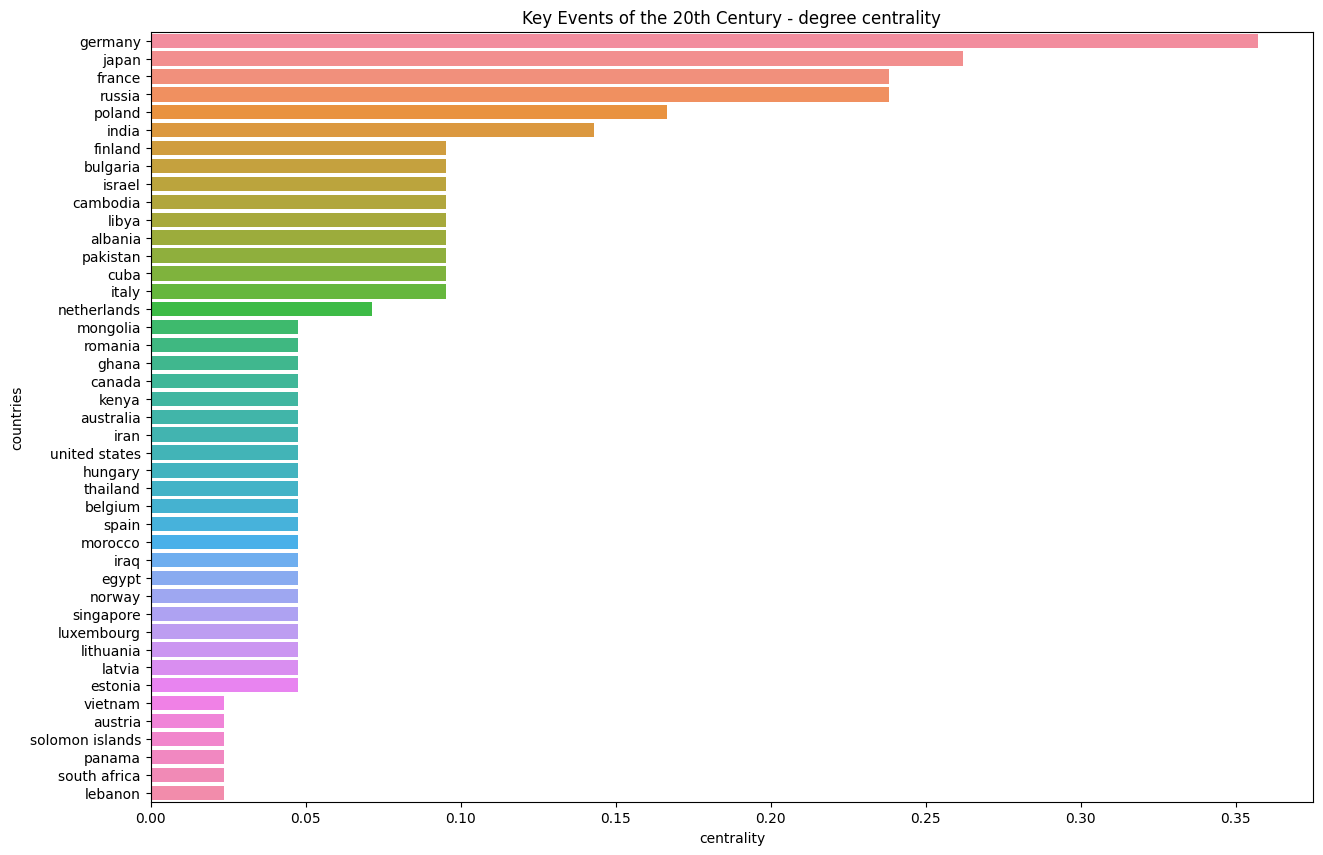

In [25]:
# Plot the degree centrality
plt.figure(figsize = (15, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("Key Events of the 20th Century - degree centrality")

### Observations on Degree Centrality

From the degree centrality values, we can identify the most connected countries in the network, as represented by their centrality scores. 

- **High Degree Centrality**: Countries like **Germany** (0.357), **Russia** (0.238), **France** (0.238), and **Japan** (0.261) have the highest degree centrality scores. These nations are likely central players in the network, indicating frequent interactions or importance in events during the 20th century. This aligns with their historical geopolitical influence in global affairs.

- **Medium Degree Centrality**: Countries such as **Poland** (0.166), **India** (0.142), and **Italy** (0.095) show moderate centrality, which suggests they are important but not as frequently involved as the top countries. Their roles may be shaped by regional influence or participation in key alliances or events.

- **Low Degree Centrality**: Countries like **Panama** (0.023), **Solomon Islands** (0.023), and **South Africa** (0.023) have the lowest degree centrality scores. These countries are less involved or connected in the network, potentially indicating a more isolated role or fewer interactions with other countries in the context of the 20th century.

The degree centrality measure gives us a sense of the relative prominence of each country based on its number of connections within the network, reflecting their geopolitical or strategic relevance.

## Closeness centrality

In [26]:
closeness_dict = nx.closeness_centrality(G)
closeness_dict

{'france': 0.46153846153846156,
 'panama': 0.3181818181818182,
 'russia': 0.4883720930232558,
 'germany': 0.5121951219512195,
 'bulgaria': 0.40384615384615385,
 'italy': 0.38181818181818183,
 'austria': 0.34146341463414637,
 'spain': 0.35294117647058826,
 'poland': 0.44680851063829785,
 'estonia': 0.35,
 'latvia': 0.26582278481012656,
 'lithuania': 0.2896551724137931,
 'finland': 0.3925233644859813,
 'netherlands': 0.34146341463414637,
 'luxembourg': 0.2625,
 'belgium': 0.2692307692307692,
 'norway': 0.35294117647058826,
 'albania': 0.38181818181818183,
 'libya': 0.3230769230769231,
 'egypt': 0.27631578947368424,
 'iraq': 0.33070866141732286,
 'japan': 0.47191011235955055,
 'morocco': 0.3442622950819672,
 'thailand': 0.32558139534883723,
 'singapore': 0.32558139534883723,
 'solomon islands': 0.3230769230769231,
 'india': 0.4375,
 'pakistan': 0.3888888888888889,
 'israel': 0.3783783783783784,
 'south africa': 0.27631578947368424,
 'iran': 0.358974358974359,
 'cambodia': 0.31578947368421

In [27]:
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

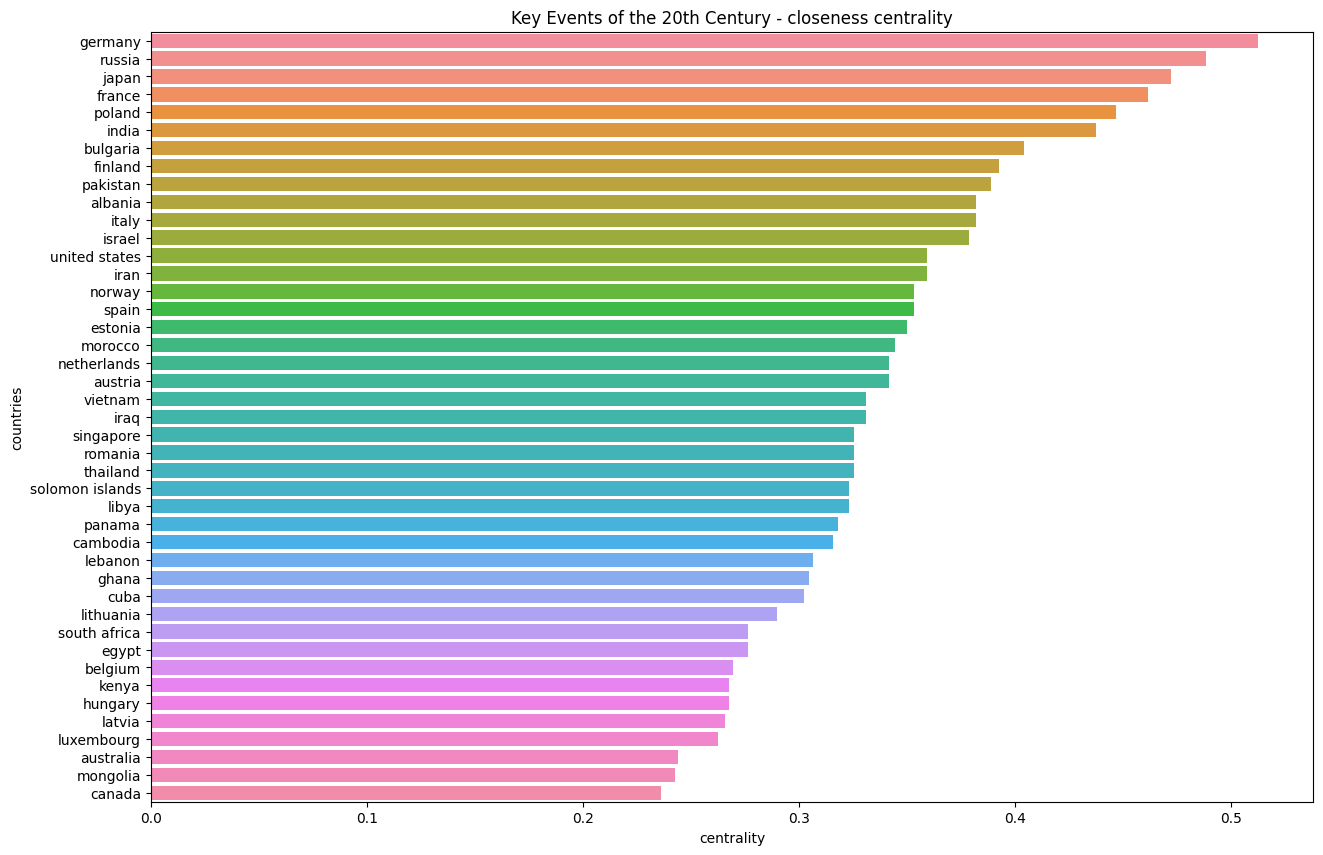

In [28]:
# Plot the closeness centrality
plt.figure(figsize = (15, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("Key Events of the 20th Century - closeness centrality")

### Observations on Closeness Centrality

Closeness centrality measures how easily a country can access other countries in the network, with higher values indicating quicker access to the entire network. Here are some key observations:

- **High Closeness Centrality**: 
  Countries like **Germany** (0.512), **Russia** (0.488), **Japan** (0.471), and **France** (0.461) have the highest closeness centrality scores, meaning they are positioned to reach other countries in the network quickly. This suggests that these countries have significant influence and are central to information or event flow in the network, reflecting their role as key players in global or regional geopolitics.

- **Medium Closeness Centrality**: 
  Countries such as **Poland** (0.446), **India** (0.437), and **Italy** (0.381) have moderate closeness scores. These countries may not be as central as the top ones, but they still maintain relatively quick access to the rest of the network, indicating a strong role in their regions or certain international contexts.

- **Low Closeness Centrality**: 
  Countries like **Canada** (0.236), **Mongolia** (0.243), and **Vietnam** (0.331) have lower closeness scores, meaning they are more distant from other countries in the network. These countries may play a more isolated or peripheral role in the context of the 20th century's global interactions, where their influence or accessibility is more limited compared to the central players.

In summary, the closeness centrality highlights which countries have the potential to be hubs for information and decision-making, with the top countries being those with the most influential positions in the network.

## Betweenness centrality

In [30]:
betweenness_dict = nx.betweenness_centrality(G)
betweenness_dict

{'france': 0.12334218240141587,
 'panama': 0.0,
 'russia': 0.2293318953597699,
 'germany': 0.37466954261379354,
 'bulgaria': 0.012268864185240489,
 'italy': 0.006194347657762293,
 'austria': 0.0,
 'spain': 0.0,
 'poland': 0.12581623435281972,
 'estonia': 0.03900503290747193,
 'latvia': 0.0011614401858304297,
 'lithuania': 0.007452574525745259,
 'finland': 0.05158730158730158,
 'netherlands': 0.045452869494681344,
 'luxembourg': 0.00483933410762679,
 'belgium': 0.004682631860332209,
 'norway': 0.04513946500009218,
 'albania': 0.07782939734159247,
 'libya': 0.032694541231126605,
 'egypt': 0.0031358885017421603,
 'iraq': 0.026364692218350753,
 'japan': 0.2590131445532143,
 'morocco': 0.0,
 'thailand': 0.0,
 'singapore': 0.0,
 'solomon islands': 0.0,
 'india': 0.07806260715668381,
 'pakistan': 0.11337038880592888,
 'israel': 0.0787880463838652,
 'south africa': 0.0,
 'iran': 0.013204468779381669,
 'cambodia': 0.09337426027321497,
 'kenya': 0.011265969802555167,
 'ghana': 0.0259443614844311

In [31]:
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

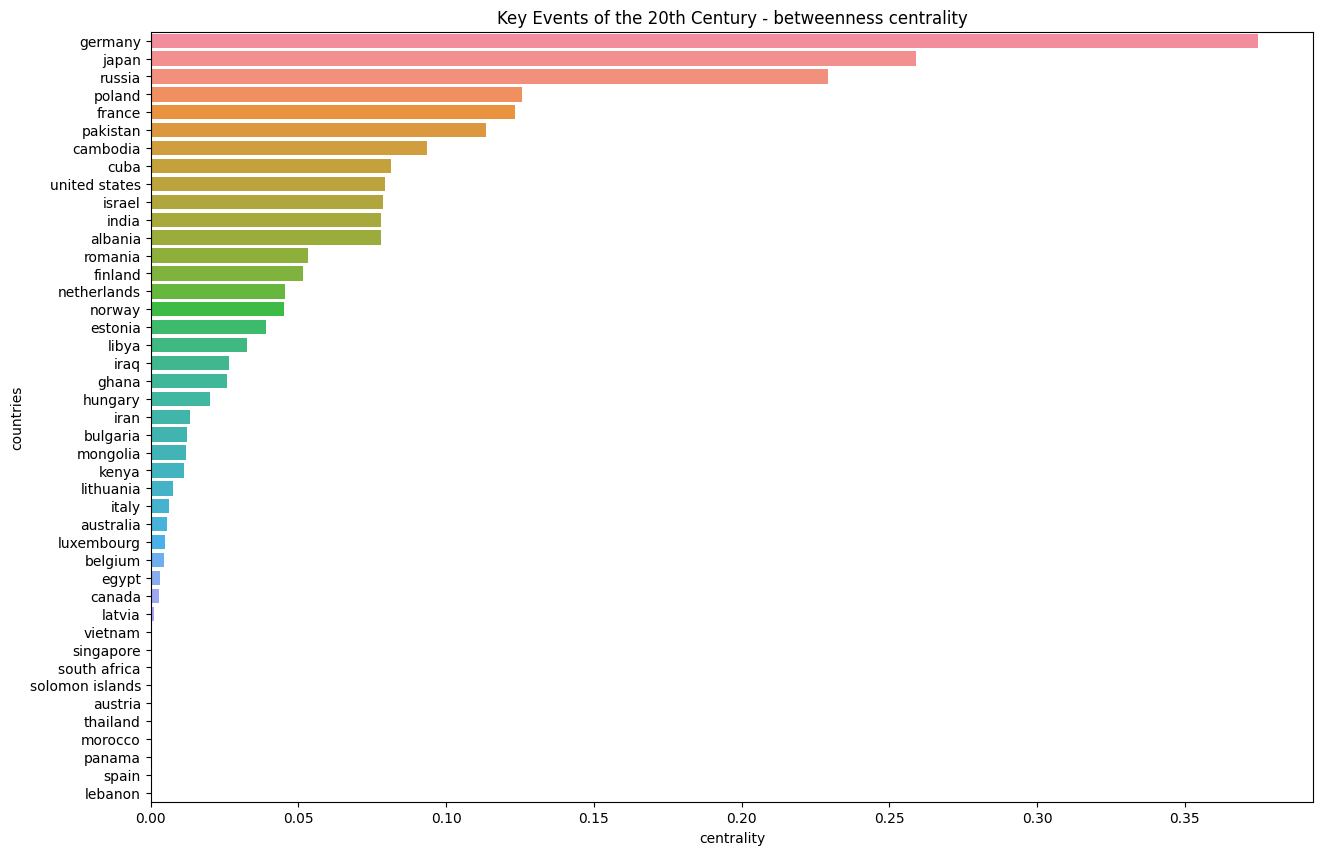

In [32]:
# Plot the betweenness centrality
plt.figure(figsize = (15, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("Key Events of the 20th Century - betweenness centrality")

### Observations on Betweenness Centrality

Betweenness centrality measures how often a country acts as a bridge or intermediary between other countries in the network. High betweenness indicates that a country controls or facilitates information flow across the network. Here are the key observations:

- **High Betweenness Centrality**: 
  **Germany** (0.375), **Russia** (0.229), and **Japan** (0.259) have the highest betweenness centrality scores. These countries play a pivotal role in connecting various parts of the network, acting as crucial intermediaries. For example, Germany's role in connecting Western and Eastern Europe, and Japan's influence in East Asia and beyond, reflects this central function.

- **Moderate Betweenness Centrality**: 
  Countries like **India** (0.078), **Pakistan** (0.113), and **Albania** (0.078) have moderate betweenness centrality. These nations help connect specific regions or groups within the network, which could be seen in the context of alliances or regional cooperation during the 20th century.

- **Low or Zero Betweenness Centrality**: 
  Countries like **Panama**, **Austria**, **South Africa**, and **Vietnam** have a betweenness centrality score of 0. This indicates that these countries do not play a significant role in connecting other countries within the network, possibly due to geographical isolation, limited international influence, or a lack of central geopolitical interactions.

In summary, betweenness centrality identifies the countries that are most critical for connecting different regions or groups within the network. Countries with higher betweenness are strategic players, controlling the flow of interactions, while those with low or zero betweenness may be more peripheral in terms of their role in global or regional affairs.

In [33]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')